In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [178]:
df = pd.read_csv('../data/recent-grads.csv')
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [99]:
df_cut = df.loc[:, 'Total':'Employed']
df_cut['Median'] = df.Median
def dom(x):
    if x>=51:
        return 'Male'
    if x<=49:
        return 'Female'
    else:
        return 'Nuetral'
    
df_cut['PercentMale'] = df_cut[['Total', 'Men']].apply((lambda x: x[1]*100/x[0]), axis=1)
df_cut['DominantSex'] = df_cut.PercentMale.apply(dom)
df_cut.DominantSex.value_counts()

Female     92
Male       75
Nuetral     6
Name: DominantSex, dtype: int64

In [137]:
df_cut.reset_index(inplace=True)
melted = df_cut[['index', 'Median', 'DominantSex']].melt(id_vars='index')

AttributeError: 'NoneType' object has no attribute 'to_numpy'

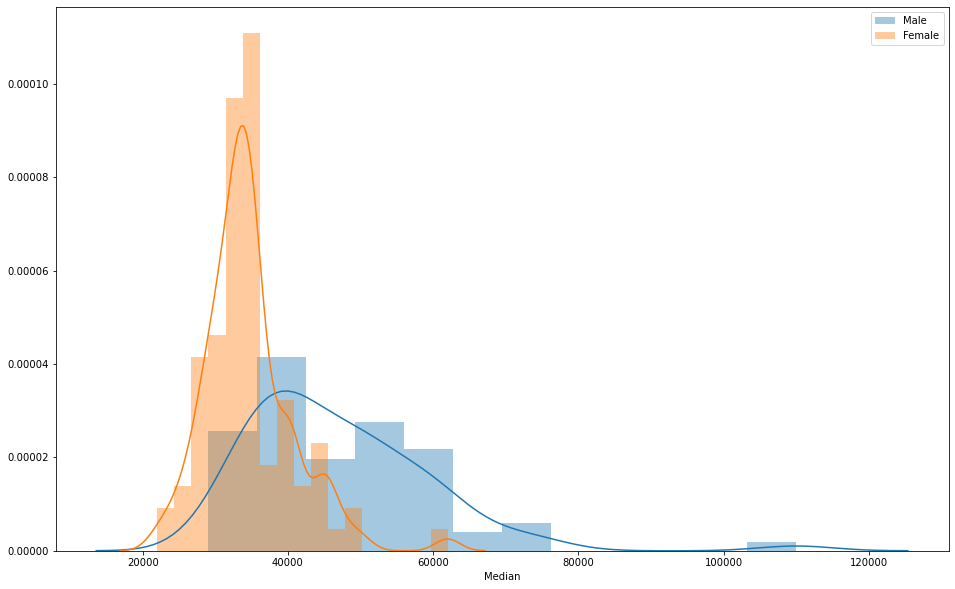

In [173]:
male_dom = df_cut.loc[df_cut.DominantSex == 'Male'].Median
fem_dom = df_cut.loc[df_cut.DominantSex == 'Female'].Median

fig, ax = plt.subplots(figsize=(16,10))
for meds in [male_dom, fem_dom]:
    sns.distplot(meds)
plt.legend(labels=["Male", "Female"])
plt.show()

In [171]:
male_dom.mean()

47148.0

In [172]:
fem_dom.mean()

34631.52173913043